# Project 1 

## Group One: Covid 19 | Part One: Data Cleansing 

Team Members: Michael Bien, Lupita Lopez, Jinah Porter, Debra Wu

### Research Questions to Answer:

1. WORLD: Compare COVID deaths by GDP by Country: Does a higher GDP result in a lower number of COVID deaths?

2. US: Examine death rates by age group and determine is children under 10 die at a lower rate, adults 60+ at a higher rate

3. US: Compare cases/deaths by state

4. US: Does pre-COVID state GDP related to the cases/deaths in a given state

5. March shutdown, 4th of July and Memorial Day: compare 2 months of shutdown vs. reopening: how did reopening affect case and death rates? 

6. US: Is there a relationship between COVID cases/deaths and gender?

7. US: Is there a relationship between COVID cases/deaths and ethnicity?


In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import numpy as np
import requests
import gmaps
import json

from pprint import pprint

In [2]:
data = pd.read_csv("data_cdc.csv")
data.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/9/20,2/1/20,9/5/20,United States,All Sexes,All Ages,"175,866","1,894,447","180,095","78,446","6,671","283,199",NaN
1,9/9/20,2/1/20,9/5/20,United States,All Sexes,Under 1 year,19,"10,513",99,3,16,131,NaN
2,9/9/20,2/1/20,9/5/20,United States,All Sexes,0-17 years,88,"18,631",296,17,123,490,NaN
3,9/9/20,2/1/20,9/5/20,United States,All Sexes,1-4 years,14,"2,021",70,2,42,124,NaN
4,9/9/20,2/1/20,9/5/20,United States,All Sexes,5-14 years,29,"3,110",94,8,52,167,NaN


In [3]:
data.dropna(how="all", inplace=True)
data.count()
data["COVID-19 Deaths"] = data["COVID-19 Deaths"].str.replace(",","", regex=True).astype('float')
data.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/9/20,2/1/20,9/5/20,United States,All Sexes,All Ages,175866.0,"1,894,447","180,095","78,446","6,671","283,199",NaN
1,9/9/20,2/1/20,9/5/20,United States,All Sexes,Under 1 year,19.0,"10,513",99,3,16,131,NaN
2,9/9/20,2/1/20,9/5/20,United States,All Sexes,0-17 years,88.0,"18,631",296,17,123,490,NaN
3,9/9/20,2/1/20,9/5/20,United States,All Sexes,1-4 years,14.0,"2,021",70,2,42,124,NaN
4,9/9/20,2/1/20,9/5/20,United States,All Sexes,5-14 years,29.0,"3,110",94,8,52,167,NaN


In [4]:
df_US = data[data["State"] == "United States"]
df_US_all_sex = df_US[df_US["Sex"] == "All Sexes"]
df_US_all_sex.head(15)

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/9/20,2/1/20,9/5/20,United States,All Sexes,All Ages,175866.0,"1,894,447","180,095","78,446","6,671","283,199",NaN
1,9/9/20,2/1/20,9/5/20,United States,All Sexes,Under 1 year,19.0,"10,513",99,3,16,131,NaN
2,9/9/20,2/1/20,9/5/20,United States,All Sexes,0-17 years,88.0,"18,631",296,17,123,490,NaN
3,9/9/20,2/1/20,9/5/20,United States,All Sexes,1-4 years,14.0,"2,021",70,2,42,124,NaN
4,9/9/20,2/1/20,9/5/20,United States,All Sexes,5-14 years,29.0,"3,110",94,8,52,167,NaN
5,9/9/20,2/1/20,9/5/20,United States,All Sexes,15-24 years,315.0,"19,998",402,111,53,655,NaN
6,9/9/20,2/1/20,9/5/20,United States,All Sexes,18-29 years,765.0,"35,561",963,315,100,"1,503",NaN
7,9/9/20,2/1/20,9/5/20,United States,All Sexes,25-34 years,1360.0,"41,370","1,513",606,151,"2,404",NaN
8,9/9/20,2/1/20,9/5/20,United States,All Sexes,30-49 years,8024.0,"124,473","7,476","3,560",565,"12,427",NaN
9,9/9/20,2/1/20,9/5/20,United States,All Sexes,35-44 years,3542.0,"58,523","3,377","1,547",247,"5,590",NaN


In [5]:
age_group = df_US_all_sex["Age group"]
age_group

0              All Ages
1          Under 1 year
2            0-17 years
3             1-4 years
4            5-14 years
5           15-24 years
6           18-29 years
7           25-34 years
8           30-49 years
9           35-44 years
10          45-54 years
11          50-64 years
12          55-64 years
13          65-74 years
14          75-84 years
15    85 years and over
Name: Age group, dtype: object

In [6]:
death_counts = df_US_all_sex.groupby("Age group")["COVID-19 Deaths"].sum()
death_counts
#apply(list).reset_index(name="COVID-19 Deaths")

Age group
0-17 years               88.0
1-4 years                14.0
15-24 years             315.0
18-29 years             765.0
25-34 years            1360.0
30-49 years            8024.0
35-44 years            3542.0
45-54 years            9324.0
5-14 years               29.0
50-64 years           27980.0
55-64 years           22254.0
65-74 years           37684.0
75-84 years           46487.0
85 years and over     54838.0
All Ages             175866.0
Under 1 year             19.0
Name: COVID-19 Deaths, dtype: float64

In [7]:
death_by_age = pd.DataFrame({"Number of Deaths": death_counts})

#dropping a few overlap age_group columns
death_by_age2 = death_by_age.drop(["0-17 years", "18-29 years", "30-49 years", "50-64 years", "All Ages"])

death_by_age2["age_index"] = "b", "d", "e", "f", "g", "c", "h", "i", "j", "k", "a"

death_by_age3 = death_by_age2.sort_values(by=["age_index"])

death_by_age3.style.format({"Number of Deaths":"{:,.0f}"})

,Number of Deaths,age_index
Age group,,
Under 1 year,19,a
1-4 years,14,b
5-14 years,29,c
15-24 years,315,d
25-34 years,"1,360",e
35-44 years,"3,542",f
45-54 years,"9,324",g
55-64 years,"22,254",h
65-74 years,"37,684",i


In [8]:
death_by_age3.drop(columns=["age_index"])

,Number of Deaths
Age group,
Under 1 year,19.0
1-4 years,14.0
5-14 years,29.0
15-24 years,315.0
25-34 years,1360.0
35-44 years,3542.0
45-54 years,9324.0
55-64 years,22254.0
65-74 years,37684.0


<function matplotlib.pyplot.show(*args, **kw)>

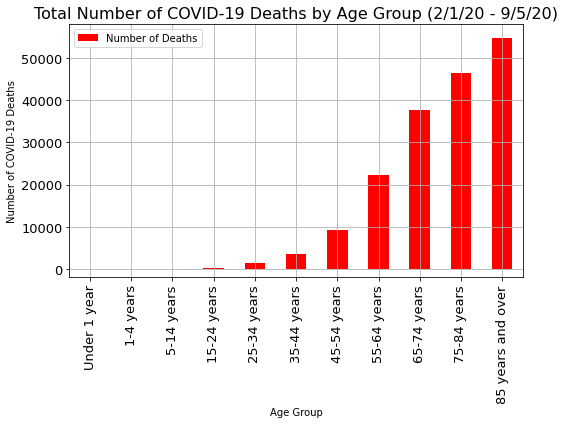

In [9]:
ax = death_by_age3.plot(kind="bar", figsize=(8,6), color="red", fontsize=13)
ax.set_alpha(0.8)

plt.xlabel("Age Group")
plt.ylabel("Number of COVID-19 Deaths")

plt.title("Total Number of COVID-19 Deaths by Age Group (2/1/20 - 9/5/20)", fontsize=16)

plt.ylim(-2000, 58000)

plt.grid(True)
plt.tight_layout()

plt.savefig("deaths_by_agegroup")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

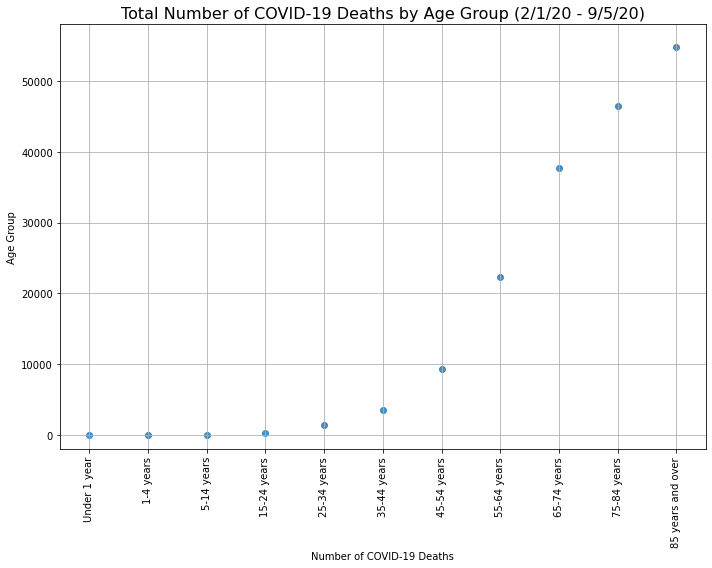

In [10]:
x_values = death_by_age3.index
y_values = death_by_age3['Number of Deaths']

plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values, alpha=0.8)

plt.xlabel("Number of COVID-19 Deaths")
plt.ylabel("Age Group")

plt.title("Total Number of COVID-19 Deaths by Age Group (2/1/20 - 9/5/20)", fontsize=16)
plt.xticks(rotation='vertical')

plt.ylim(-2000, 58000)

plt.grid(True)
plt.tight_layout()

plt.savefig("deaths_by_agegroup(scatter)")
plt.show

In [11]:
df_US_male = df_US[df_US["Sex"] == "Male"]
df_US_female = df_US[df_US["Sex"] == "Female"]
#df_US_unknown = df_US[df_US["Sex"] == "Unknown"]

death_counts_male = df_US_male.groupby("Age group")["COVID-19 Deaths"].sum()
death_counts_female = df_US_female.groupby("Age group")["COVID-19 Deaths"].sum()
#death_counts_unknown = df_US_unknown.groupby("Age group")["COVID-19 Deaths"].sum()

death_by_sex = pd.DataFrame({"Number of Deaths (Male)": death_counts_male, 
                             "Number of Deaths (Female)": death_counts_female,
                             "Total Number of Deaths": death_counts})

#dropping a few overlap age_group columns
death_by_sex2 = death_by_sex.drop(["0-17 years", "18-29 years", "30-49 years", "50-64 years", "All Ages"])

death_by_sex2["age_index"] = "b", "d", "e", "f", "g", "c", "h", "i", "j", "k", "a"

death_by_sex3 = death_by_sex2.sort_values(by=["age_index"])

death_by_sex3.style.format({"Number of Deaths (Male)":"{:,.0f}", 
                           "Number of Deaths (Female)":"{:,.0f}",
                           "Total Number of Deaths":"{:,.0f}"})

,Number of Deaths (Male),Number of Deaths (Female),Total Number of Deaths,age_index
Age group,,,,
Under 1 year,13,6,19,a
1-4 years,7,7,14,b
5-14 years,20,9,29,c
15-24 years,195,120,315,d
25-34 years,904,456,"1,360",e
35-44 years,"2,430","1,112","3,542",f
45-54 years,"6,362","2,961","9,324",g
55-64 years,"14,493","7,761","22,254",h
65-74 years,"23,213","14,470","37,684",i


In [12]:
death_by_sex3.drop(columns=["age_index"])

,Number of Deaths (Male),Number of Deaths (Female),Total Number of Deaths
Age group,,,
Under 1 year,13.0,6.0,19.0
1-4 years,7.0,7.0,14.0
5-14 years,20.0,9.0,29.0
15-24 years,195.0,120.0,315.0
25-34 years,904.0,456.0,1360.0
35-44 years,2430.0,1112.0,3542.0
45-54 years,6362.0,2961.0,9324.0
55-64 years,14493.0,7761.0,22254.0
65-74 years,23213.0,14470.0,37684.0


<function matplotlib.pyplot.show(*args, **kw)>

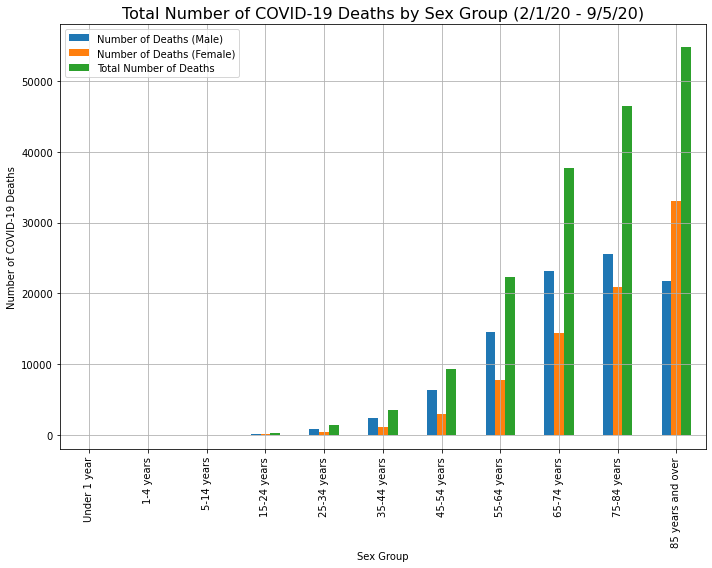

In [13]:
ax2 = death_by_sex3.plot(kind="bar", figsize=(10,8))

plt.xlabel("Sex Group")
plt.ylabel("Number of COVID-19 Deaths")
    
plt.title("Total Number of COVID-19 Deaths by Sex Group (2/1/20 - 9/5/20)", fontsize=16)

plt.ylim(-2000, 58000)

plt.grid(True)
plt.tight_layout()

plt.savefig("deaths_by_sex(bar)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

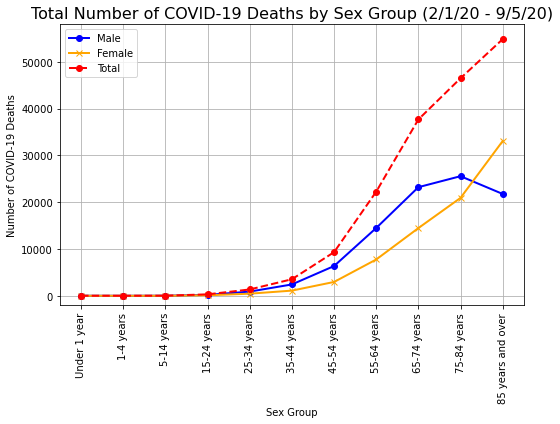

In [14]:
plt.figure(figsize=(8, 6))

male = plt.plot(death_by_sex3.index, death_by_sex3["Number of Deaths (Male)"], marker='o', color='blue', 
                linewidth=2, label="Male")
female = plt.plot(death_by_sex3.index, death_by_sex3["Number of Deaths (Female)"], marker='x', color='orange', 
                  linewidth=2, label="Female")
total = plt.plot(death_by_sex3.index, death_by_sex3["Total Number of Deaths"], marker='o', color='red', 
                 linewidth=2, linestyle='dashed', label="Total")
plt.legend(loc="best")

plt.xlabel("Sex Group")
plt.ylabel("Number of COVID-19 Deaths")
plt.xticks(rotation='vertical')

plt.title("Total Number of COVID-19 Deaths by Sex Group (2/1/20 - 9/5/20)", fontsize=16)

plt.ylim(-2000, 58000)

plt.grid(True)
plt.tight_layout()

plt.savefig("deaths_by_sex(line)")
plt.show

In [15]:
data2 = pd.read_csv("fig03 (1).csv")
data2.head()

,Sex and year,All causes,Heart disease,Cancer,Unintentional injuries2,CLRD3,Stroke4,Diabetes5,Alzheimer's disease
0,All persons,"Age-adjusted deaths per 100,000 population/6",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,775.3,196.1,179.3,40.4,41.4,43.5,22.8,23.8
2,2008,774.9,192.1,176.4,39.2,44.7,42.1,22.0,25.8
3,2009,749.6,182.8,173.5,37.5,42.7,39.6,21.0,24.2
4,2010,747,179.1,172.8,38.0,42.2,39.1,20.8,25.1


In [25]:
data2.dropna(how="all", inplace=True)
data2.dtypes

death_2017 = data2[data2["Sex and year"] == "2017"]
#death_2017

death_2017_clean = death_2017[:3]
death_2017_clean_2 = death_2017_clean.drop(death_2017_clean.index[0])
death_2017_clean_2

death_2017_clean_3 = death_2017_clean_2.rename(index={23: "Male", 35:"Female"})
death_2017_clean_3.drop(columns=["Sex and year"])

,All causes,Heart disease,Cancer,Unintentional injuries2,CLRD3,Stroke4,Diabetes5,Alzheimer's disease
Male,864.5,209.0,181.1,67.8,45.0,38.0,26.8,24.9
Female,619.7,129.6,131.4,32.0,38.1,36.6,17.1,34.8


In [102]:
death_2017_clean_3.plot(kind="bar", figsize=(10,8))

plt.xlabel("Sex Group")
plt.ylabel("Number of Deaths")
    
plt.title("Number of Deaths in Category by Sex Group (2017)", fontsize=16)
plt.xticks(rotation='0')

plt.grid(True)
plt.tight_layout()

plt.savefig("Death Category male vs. female.png")
plt.show

KeyError: 'index'